In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import phik

Reading in cleaned data

In [2]:
loans = pd.read_csv("../clean_data/loans_data.csv")

In [3]:
loans

loan_amnt       term  int_rate  installment   emp_length  \
0         5000.0  36 months     10.65       162.87    10+ years   
1         5000.0  36 months      7.90       156.46  2 - 4 years   
2         6500.0  60 months     14.65       153.45  5 - 9 years   
3         6000.0  36 months     12.42       200.50    < 2 years   
4        12000.0  36 months     16.29       423.61  5 - 9 years   
...          ...        ...       ...          ...          ...   
38279     9600.0  36 months     10.08       310.13  2 - 4 years   
38280    25000.0  36 months     10.08       807.62    < 2 years   
38281     6000.0  36 months     12.92       201.94    < 2 years   
38282     6150.0  36 months     11.03       201.44    < 2 years   
38283     3000.0  36 months     11.86        99.44  2 - 4 years   

      home_ownership  annual_inc verification_status     issue_d loan_status  \
0               RENT     24000.0            Verified  2011-12-01  Fully Paid   
1               RENT     36000.0     Source Verified  2011-12-01  Fully Paid   
2                OWN     72000.0        Not Verified  2011-12-01  Fully Paid   
3               RENT     36852.0     Source Verified  2011-12-01  Fully Paid   
4               RENT     88365.0            Verified  2011-12-01  Fully Paid   
...              ...         ...                 ...         ...         ...   
38279       MORTGAGE     60000.0        Not Verified  2008-04-01  Fully Paid   
38280       MORTGAGE    145000.0        Not Verified  2008-04-01  Fully Paid   
38281       MORTGAGE     40800.0        Not Verified  2008-03-01  Fully Paid   
38282           RENT     35713.6        Not Verified  2008-03-01  Fully Paid   
38283       MORTGAGE     36153.0        Not Verified  2007-08-01  Fully Paid   

       ... delinq_2yrs  earliest_cr_line inq_last_6mths  open_acc  pub_rec  \
0      ...           0         36.205479            1.0       3.0        0   
1      ...           0         16.358904            3.0       9.0        0   
2      ...           0         23.197260            2.0      14.0        0   
3      ...           0         13.945205            1.0       7.0        0   
4      ...           0         24.449315            0.0       6.0        0   
...    ...         ...               ...            ...       ...      ...   
38279  ...           0         26.871233            0.0       8.0        0   
38280  ...           0         34.290411            1.0       9.0        0   
38281  ...          2+         20.446575            2.0      11.0        0   
38282  ...           0         16.443836            0.0       4.0        0   
38283  ...           0         20.698630            2.0       3.0       1+   

       revol_util state_name  grade fico_range credit_score  
0            83.7    Arizona      B      737.0         Good  
1            28.3    Arizona      A      732.0         Good  
2            20.6    Arizona      C      697.0         Good  
3            66.5    Arizona      B      697.0         Good  
4            96.4    Arizona      D      682.0         Good  
...           ...        ...    ...        ...          ...  
38279        30.9      Idaho      B      732.0         Good  
38280        14.1      Idaho      B      762.0    Very Good  
38281        47.3      Idaho      D      667.0         Fair  
38282        64.3      Idaho      C      687.0         Good  
38283        70.9    Indiana      D      667.0         Fair  

[38284 rows x 22 columns]

### Summary of Statistics

In [4]:
loans.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  38284.000000  38284.000000  38284.000000  3.828400e+04  38284.000000   
mean   11156.807021     12.000834    323.266224  6.885303e+04     13.346091   
std     7408.188582      3.726761    208.280410  6.347098e+04      6.669822   
min      500.000000      5.420000     16.080000  4.000000e+03      0.000000   
25%     5500.000000      8.940000    166.630000  4.032000e+04      8.210000   
50%    10000.000000     11.860000    278.970000  5.900000e+04     13.440000   
75%    15000.000000     14.590000    427.180000  8.200000e+04     18.620000   
max    35000.000000     24.590000   1305.190000  6.000000e+06     29.990000   

       earliest_cr_line  inq_last_6mths      open_acc    revol_util  \
count      38284.000000    38284.000000  38284.000000  38284.000000   
mean          24.117313        0.869188      9.290121     48.850521   
std            6.838040        1.068543      4.380740     28.317101   
min           12.356164        0.000000      2.000000      0.000000   
25%           19.528767        0.000000      6.000000     25.400000   
50%           22.868493        1.000000      9.000000     49.300000   
75%           27.284932        1.000000     12.000000     72.400000   
max           75.232877        8.000000     44.000000     99.900000   

         fico_range  
count  38284.000000  
mean     717.060469  
std       35.820829  
min      662.000000  
25%      687.000000  
50%      712.000000  
75%      742.000000  
max      827.000000

Checking there aren't any missing values.

In [5]:
loans.isnull().any()

loan_amnt              False
term                   False
int_rate               False
installment            False
emp_length             False
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
purpose                False
dti                    False
delinq_2yrs            False
earliest_cr_line       False
inq_last_6mths         False
open_acc               False
pub_rec                False
revol_util             False
state_name             False
grade                  False
fico_range             False
credit_score           False
dtype: bool

## Pandas Profiling

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(loans)

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Dropping credit_score as this was made for analysis purposes and won't be used in the model. Issue date is also information which is specific to applications and does not add value to future predictions. States are being excluded from the model as this could lead to bias.

In [7]:
loans = loans.drop(["credit_score", "issue_d", "state_name"], axis = 1).copy()

The Panda's Profile shows "installment" and "loan_amnt" are highly correlated so only one of these variables will be required to avoid overfitting.

In [8]:
loans = loans.drop(["installment"], axis = 1)

Panda's Profiling also shows the annual_inc variable is highly skewed so will take the log-transform of the values.

In [9]:
loans['annual_inc'] = loans['annual_inc'].apply(lambda x:np.log10(x+1))

In [10]:
loans['annual_inc'].describe()

count    38284.000000
mean         4.765168
std          0.242017
min          3.602169
25%          4.605531
50%          4.770859
75%          4.913819
max          6.778151
Name: annual_inc, dtype: float64

Converting loan_status to numerical data for modelling.

In [11]:
loan_status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
loans = loans.replace(loan_status_replace)

In [12]:
loans.dtypes

loan_amnt              float64
term                    object
int_rate               float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status              int64
purpose                 object
dti                    float64
delinq_2yrs             object
earliest_cr_line       float64
inq_last_6mths         float64
open_acc               float64
pub_rec                 object
revol_util             float64
grade                   object
fico_range             float64
dtype: object

## Splitting into predictors and target variable

In [13]:
X = loans.drop(columns = "loan_status")
y = loans["loan_status"]

### Test & Train Data
Using a 20/80 split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Creating Visualisation of Correlations

Checking correlations between predictor variables.

interval columns not set, guessing: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_util', 'fico_range']


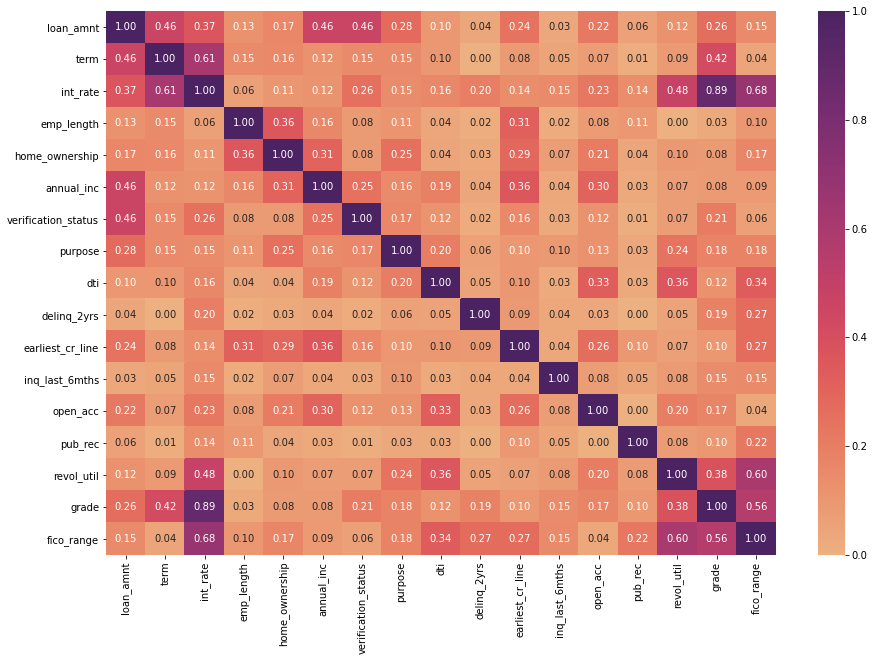

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
corr_heatmap = sns.heatmap(X_train.phik_matrix(), annot = True, fmt = ".2f", cmap = "flare", ax = ax)

From the Phi(k) correlation matrix:
* int_rate is linearly correlated with grade - 0.88

Removing grade.

In [17]:
X_train = X_train.drop(columns = "grade")
X_test = X_test.drop(columns = "grade")

Checking correlation between target and remaining predictor variables.

In [18]:
train_test = pd.concat([X_train, y_train], axis = 1)

In [19]:
abs(train_test.phik_matrix()["loan_status"]).reset_index(
    name = "target_corr").sort_values("target_corr", ascending = False)

interval columns not set, guessing: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_util', 'fico_range', 'loan_status']


index  target_corr
16          loan_status     1.000000
2              int_rate     0.268067
1                  term     0.252763
15           fico_range     0.157148
14           revol_util     0.127433
7               purpose     0.120637
13              pub_rec     0.092932
5            annual_inc     0.084914
0             loan_amnt     0.076512
11       inq_last_6mths     0.073984
8                   dti     0.060212
3            emp_length     0.038801
4        home_ownership     0.035880
12             open_acc     0.030741
6   verification_status     0.028660
10     earliest_cr_line     0.017979
9           delinq_2yrs     0.008791

Looks ok so happy to keep these variables in.

### Dummy Variables

Now generating dummy variables for categorical variables.

In [20]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

## Logistic Regression Model

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix


## Pipeline

Gives a more reproducible and transportable model.

In [22]:
#Standard Scaling
lr_model_pipeline = Pipeline([('ss', StandardScaler()), ('lr_ss', LogisticRegression())])

lr_model_pipeline.fit(X_train, y_train)

lr_model_pipeline_pred = lr_model_pipeline.predict(X_test)

print("Training Model Score -", lr_model_pipeline.score(X_train, y_train),
      '\n',
      "Trained Model on Test Data Model Score -", accuracy_score(y_test, lr_model_pipeline_pred),
      '\n',
      "Classification Report -", 
      '\n',
      classification_report(y_test, lr_model_pipeline_pred),
      '\n',
      "Classification Predictions -", lr_model_pipeline_pred,
      '\n',
      "ROC AUC Score -", roc_auc_score(y_true = y_test, y_score = lr_model_pipeline.predict_proba(X_test) [:, 1]),
      '\n',
      "Confusion Matrix -", 
      '\n',
      confusion_matrix(y_test, lr_model_pipeline_pred)
     )

Training Model Score - 0.8570215822640154 
 Trained Model on Test Data Model Score - 0.8522920203735145 
 Classification Report - 
               precision    recall  f1-score   support

           0       0.43      0.02      0.03      1125
           1       0.85      1.00      0.92      6532

    accuracy                           0.85      7657
   macro avg       0.64      0.51      0.48      7657
weighted avg       0.79      0.85      0.79      7657
 
 Classification Predictions - [1 1 1 ... 1 1 1] 
 ROC AUC Score - 0.70857644417228 
 Confusion Matrix - 
 [[  18 1107]
 [  24 6508]]


In [23]:
#Test & Training Confusion Matrices
import itertools

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap="flare"):
    y_pred_labels = (y_pred>th).astype(int)
    
    c_matrix = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(c_matrix, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = c_matrix.max() / 2.
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        ax.text(j, i, c_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if c_matrix[i, j] > thresh else "black")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

In [24]:
#Function to obtain ROC Curve
def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    
    test_text = 'accuracy = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([test_text])

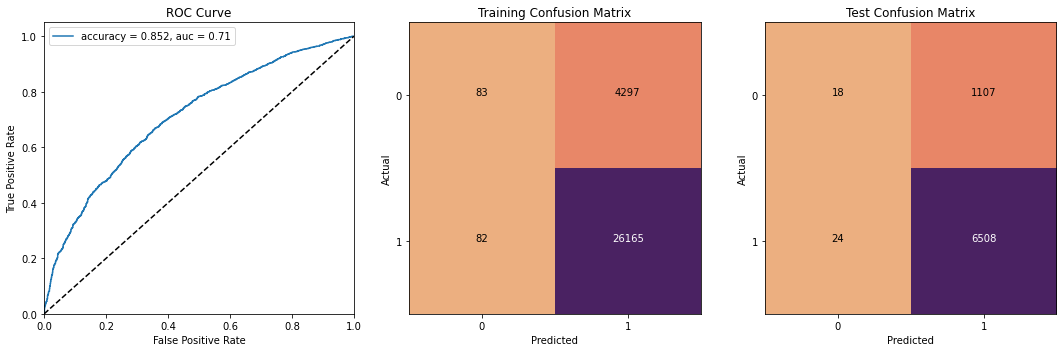

In [25]:
#Using a default threshold of 0.5
threshold = 0.5
y_train_pred = lr_model_pipeline.predict_proba(X_train)[:,1]
y_test_pred = lr_model_pipeline.predict_proba(X_test)[:,1]

#Show three plots
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

#ROC auc curve plot
plot_auc(ax[0], y_train, y_train_pred, y_test, y_test_pred, threshold)
#Training matrix
plot_cm(ax[1],  y_train, y_train_pred, [0,1], 'Training Confusion Matrix', threshold)
#Test confusion matrix
plot_cm(ax[2],  y_test, y_test_pred,   [0,1], 'Test Confusion Matrix', threshold)
    
plt.tight_layout()
plt.show()

## Lasso

## Decision Tree

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#using 600 decision trees
tree_model = DecisionTreeClassifier(max_depth = 5)

tree_model.fit(X_train, y_train)

tree_model_predictions = tree_model.predict(X_test)

print("Training Model Score -", tree_model.score(X_train, y_train),
      '\n',
      "Trained Model on Test Data Model Score -", accuracy_score(y_test, tree_model_predictions),
      '\n',
      "Classification Report -", 
      '\n',
      classification_report(y_test, tree_model_predictions),
      '\n',
      "Classification Predictions -", tree_model_predictions,
      '\n',
      "ROC AUC Score -", roc_auc_score(y_true = y_test, y_score = tree_model.predict_proba(X_test) [:, 1]),
      '\n',
      "Confusion Matrix -", 
      '\n',
      confusion_matrix(y_test, tree_model_predictions)
     )

Training Model Score - 0.8572174878375289 
 Trained Model on Test Data Model Score - 0.8522920203735145 
 Classification Report - 
               precision    recall  f1-score   support

           0       0.25      0.00      0.01      1125
           1       0.85      1.00      0.92      6532

    accuracy                           0.85      7657
   macro avg       0.55      0.50      0.46      7657
weighted avg       0.76      0.85      0.79      7657
 
 Classification Predictions - [1 1 1 ... 1 1 1] 
 ROC AUC Score - 0.6776560522555625 
 Confusion Matrix - 
 [[   3 1122]
 [   9 6523]]


In [28]:
#Test & Training Confusion Matrices

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap="flare"):
    y_pred_labels = (y_pred>th).astype(int)
    
    c_matrix = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(c_matrix, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = c_matrix.max() / 2.
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        ax.text(j, i, c_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if c_matrix[i, j] > thresh else "black")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

In [29]:
#Function to obtain ROC Curve
def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    
    test_text = 'accuracy = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([test_text])

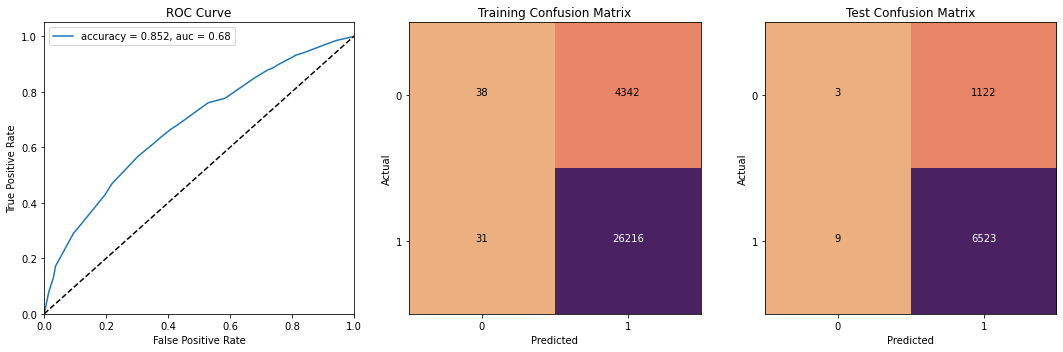

In [30]:
#Using a default threshold of 0.5
threshold = 0.5
y_train_pred = tree_model.predict_proba(X_train)[:,1]
y_test_pred = tree_model.predict_proba(X_test)[:,1]

#Show three plots
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

#ROC auc curve plot
plot_auc(ax[0], y_train, y_train_pred, y_test, y_test_pred, threshold)
#Training matrix
plot_cm(ax[1],  y_train, y_train_pred, [0,1], 'Training Confusion Matrix', threshold)
#Test confusion matrix
plot_cm(ax[2],  y_test, y_test_pred,   [0,1], 'Test Confusion Matrix', threshold)
    
plt.tight_layout()
plt.show()

## Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

#using 600 decision trees
rf_model = RandomForestClassifier(n_estimators = 600)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print("Training Model Score -", rf_model.score(X_train, y_train),
      '\n',
      "Trained Model on Test Data Model Score -", accuracy_score(y_test, rf_predictions),
      '\n',
      "Classification Report -", 
      '\n',
      classification_report(y_test, rf_predictions),
      '\n',
      "Classification Predictions -", rf_predictions,
      '\n',
      "ROC AUC Score -", roc_auc_score(y_true = y_test, y_score = rf_model.predict_proba(X_test) [:, 1]),
      '\n',
      "Confusion Matrix -", 
      '\n',
      confusion_matrix(y_test, rf_predictions)
     )

Training Model Score - 1.0 
 Trained Model on Test Data Model Score - 0.8524226198249968 
 Classification Report - 
               precision    recall  f1-score   support

           0       0.27      0.00      0.01      1125
           1       0.85      1.00      0.92      6532

    accuracy                           0.85      7657
   macro avg       0.56      0.50      0.46      7657
weighted avg       0.77      0.85      0.79      7657
 
 Classification Predictions - [1 1 1 ... 1 1 1] 
 ROC AUC Score - 0.6939014084507042 
 Confusion Matrix - 
 [[   3 1122]
 [   8 6524]]


In [32]:
#Test & Training Confusion Matrices
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap="flare"):
    y_pred_labels = (y_pred>th).astype(int)
    
    c_matrix = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(c_matrix, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = c_matrix.max() / 2.
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        ax.text(j, i, c_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if c_matrix[i, j] > thresh else "black")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

In [33]:
#Function to obtain ROC Curve
def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    
    test_text = 'accuracy = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([test_text])

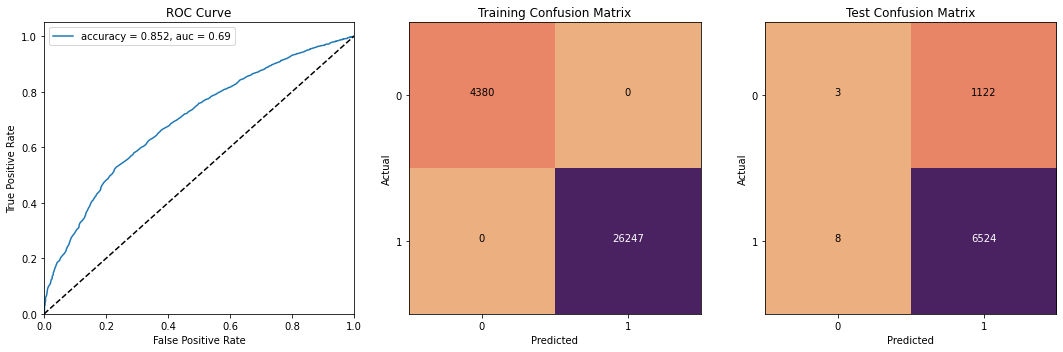

In [34]:
#Using a default threshold of 0.5
threshold = 0.5
y_train_pred = rf_model.predict_proba(X_train)[:,1]
y_test_pred = rf_model.predict_proba(X_test)[:,1]

#Show three plots
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

#ROC auc curve plot
plot_auc(ax[0], y_train, y_train_pred, y_test, y_test_pred, threshold)
#Training matrix
plot_cm(ax[1],  y_train, y_train_pred, [0,1], 'Training Confusion Matrix', threshold)
#Test confusion matrix
plot_cm(ax[2],  y_test, y_test_pred,   [0,1], 'Test Confusion Matrix', threshold)
    
plt.tight_layout()
plt.show()

## Feature Importance

In [35]:
#Generating a table of features, descending by importance
feature_importances = pd.DataFrame(
    columns = ["feature", "importance"])
feature_importances["importance"] = rf_model.feature_importances_
feature_importances["feature"] = X_test.columns
feature_importances = feature_importances.sort_values("importance", ascending = False)
feature_importances

feature  importance
1                              int_rate    0.110768
7                            revol_util    0.106895
2                            annual_inc    0.105280
3                                   dti    0.105006
4                      earliest_cr_line    0.103282
0                             loan_amnt    0.089432
6                              open_acc    0.072632
8                            fico_range    0.072061
5                        inq_last_6mths    0.034290
9                        term_60 months    0.020558
15                  home_ownership_RENT    0.015746
10               emp_length_2 - 4 years    0.014288
11               emp_length_5 - 9 years    0.014260
16  verification_status_Source Verified    0.013678
17         verification_status_Verified    0.013527
19           purpose_debt_consolidation    0.012860
12                 emp_length_< 2 years    0.012159
31                        delinq_2yrs_1    0.008908
26                        purpose_other    0.008693
28               purpose_small_business    0.008395
14                   home_ownership_OWN    0.007993
33                           pub_rec_1+    0.007840
18                  purpose_credit_card    0.007237
21             purpose_home_improvement    0.006232
23               purpose_major_purchase    0.004952
32                       delinq_2yrs_2+    0.004498
30                      purpose_wedding    0.003215
24                      purpose_medical    0.003213
25                       purpose_moving    0.003065
22                        purpose_house    0.002413
20                  purpose_educational    0.002303
29                     purpose_vacation    0.002039
27             purpose_renewable_energy    0.001183
13                 home_ownership_OTHER    0.001098

Text(0.5, 0.98, 'Importance of Features in Default Prediction Model')

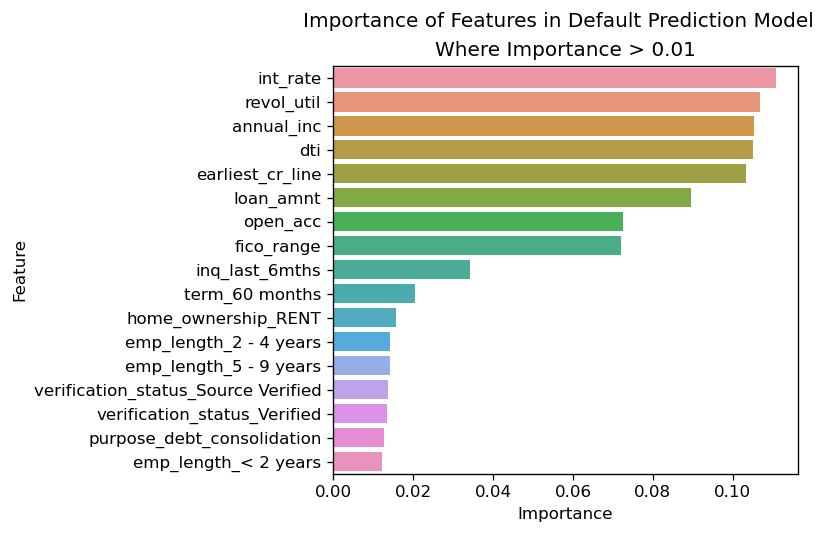

In [36]:
#Generating a plot showing the most important features
plt.rcParams['figure.figsize'] = [5, 4.5]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

#show features over 0.02
top_features = feature_importances.loc[feature_importances.importance > 0.01].copy()
ax = sns.barplot(y = "feature", x = "importance", data = top_features, orient = "h")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Where Importance > 0.01")
plt.suptitle("Importance of Features in Default Prediction Model")